# Neural Network
Perceptrons are powerful in that when multiple layers are combined, complex expressions can be created.
On the other hand, there's a downside of perceptron. That is the fact we need to set the weights and bias by ourselvers. Neural networks solve this problem.

## Activation Function
The biggest difference between perceptrons and neural networks are what is called an activation function.
In perceptron, activation function was what is called a step function that returned one if the sum of input signals was above a certain threshold and 0 otherwise. If we use instead a function called sigmoid (or modifications of it), we can turn perceptron into a neuron in a neural network.

### 1. Step Function

In [1]:
def step_function_scalar(x): # when x is a scalar
    if x > 0:
        return 1
    else:
        return 0

In [5]:
def step_function(x): # when x is a matrix, this version is better!
    y = x > 0 # y has the same dimension as x with Bool in each cell
    return y.astype(np.int) # .astype turns a bool in each cell into an int (True: 1, False: 0)

In [6]:
import numpy as np
import matplotlib.pylab as plt

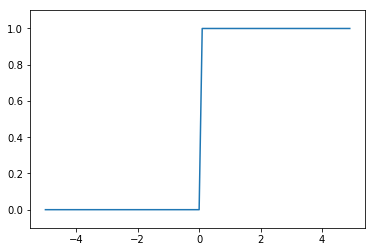

In [8]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # set the range for the y axis
plt.show()

### 2. Sigmoid Function

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

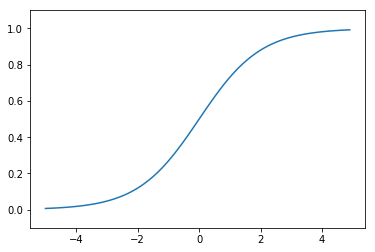

In [10]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # set the range for the y axis
plt.show()

### Comparison
Sigmoid is smoother. But they both produce y in the range of 0 <= y <= 1
Sigmoid is an example of a non-liner function. There is another commonly used activation function called ReLU.

### 3. ReLU (Rectified Linear Unit)

In [12]:
def relu(x):
    return np.maximum(0,x)

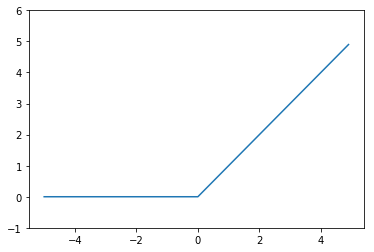

In [15]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,6) # set the range for the y axis
plt.show()

## Three Layer Neural Network
Dimension:
An -> 1 * num neurons in layer n
Zn -> 1 * num neurons in layer n
Wn -> num nerurons in layer n-1 * num neurons in layer n


In [25]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([[0.1,0.2]])
    return network

In [26]:
def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1 # weighted sum for layer 1 input
    z1 = sigmoid(a1) # activate function produces the layer 1 output
    a2 = np.dot(z1,W2) + b2 # weighted sum for layer 2 input
    z2 = sigmoid(a2) # activate function produces the layer 2 output
    a3 = np.dot(z2,W3) + b3 # weighted sum for layer 3 input
    y = a3 # activate function (identity function) produces the layer 2 output
    return y

In [27]:
network = init_network()
x = np.array([0.1,0.5])
y = forward(network,x)
print(y)

[[ 0.31234736  0.6863161 ]]


## How to design the output layer
Generally, use identity function for regression and use softmax for classification.

In [41]:
def softmax_suboptimal(a):
    exp_a = np.exp(a)
    sum_exp = np.sum(exp_a)
    return exp_a/sum_exp

In [42]:
softmax_suboptimal(np.array([0.3,1.5,1.9]))

array([ 0.10783823,  0.35803553,  0.53412624])

To deal with decimal overflows, subtract a constant inside exponential (which doesn't change the function itself). The max value in an array is often used as the constant.

In [43]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp = np.sum(exp_a)
    return exp_a/sum_exp

In [39]:
softmax(np.array([0.3,1.5,1.9]))

array([ 0.10783823,  0.35803553,  0.53412624])

The fact that sum of array elements calculated from softmax is 1 is useful because we can treat y[i] in output array as the probability of an inpurt being in ith classification.

In [40]:
np.sum(softmax(np.array([0.3,1.5,1.9])))

1.0